# COVID-19 aka Coronavirus - Exploratory Data Analysis

Data source: https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports/

In [75]:
import tabula
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set(style="white", font_scale=1.2)

In [44]:
url = "https://www.who.int/docs/default-source/coronaviruse/20200302-sitrep-42-covid-19.pdf?sfvrsn=d863e045_2"

dfs = tabula.read_pdf(url, pages="all", multiple_tables=True)

In [119]:
COLUMNS = ["Country", "Total Confirmed Cases", "Total Confirmed New Cases", "Total Deaths", "Total New Deaths", "Transmission Classification", "Days Since Last Reported Case"]

In [120]:
def clean_df(df):
    output = df.copy()
    output = output.dropna()
    output.columns = COLUMNS
    
    for col in ["Total Confirmed Cases", "Total Confirmed New Cases", "Total Deaths", "Total New Deaths", "Days Since Last Reported Case"]:
        output[col] = output[col].str.replace(r'\D+', '')
        output[col] = output[col].astype("int64")
        
    return output
    

In [220]:
outside_china_2 = dfs[2]

ignore_rows = ["Eastern Mediterranean Region", "Region of the Americas", "African Region", "Subtotal for all", "Regions", "Grand total§ 8774", "Republic of)", "Emirates", "regions", "International", "(Diamond Princess) ‡"]
outside_china_2 = outside_china_2[~outside_china_2[0].isin(ignore_rows)]

countries = []
blank_country_rows = []
country_rows_with_num = []

for index, row in outside_china_2.iterrows():

    nums = re.findall(r'\d+', row[0])
    clean_country = re.sub(r'[^a-zA-Z]', '', row[0])
    clean_country = re.sub(r' ', '', clean_country)
    if clean_country != '':
        countries.append(clean_country)
        
        if len(nums) == 1:
            country_rows_with_num.append([nums[0], row[1], row[2], row[3], row[4], row[5]])
    else: 
        blank_country_rows.append(row.values)

    
countries_df = pd.DataFrame(data=[c for c in countries if c not in ["IranIslamic", "UnitedArab"]], columns=["Country"])
countries_df.loc[countries_df["Country"] == "conveyance", "Country"] = "Diamond Princess Cruise Ship"
countries_df = countries_df["Country"].append(pd.DataFrame(data=["Iran", "UAE"]), ignore_index=True)

for v in blank_country_rows[0:2]:
    country_rows_with_num.append(list(v))
    
outside_china_2_data = pd.DataFrame(data=country_rows_with_num)
outside_china_2 = pd.concat([countries_df, outside_china_2_data], axis=1)
outside_china_2.columns = COLUMNS

In [221]:
outside_china = clean_df(dfs[1])
outside_china.head()

,Country,Total Confirmed Cases,Total Confirmed New Cases,Total Deaths,Total New Deaths,Transmission Classification,Days Since Last Reported Case
6,Republic of Korea,4212,476,22,4,Local transmission,0
7,Japan,254,15,6,1,Local transmission,0
8,Singapore,106,4,0,0,Local transmission,0
9,Australia,27,2,1,1,Local transmission,0
10,Malaysia,24,0,0,0,Local transmission,3


In [222]:
outside_china_2 = clean_df(outside_china_2)
outside_china_2.head()

,Country,Total Confirmed Cases,Total Confirmed New Cases,Total Deaths,Total New Deaths,Transmission Classification,Days Since Last Reported Case
0,Kuwait,56,11,0,0,Imported cases only,0
1,Bahrain,47,7,0,0,Imported cases only,0
2,Iraq,19,6,0,0,Imported cases only,0
3,Lebanon,10,1,0,0,Imported cases only,0
4,Oman,6,0,0,0,Imported cases only,3


In [224]:
outside_china = pd.concat([outside_china, outside_china_2])

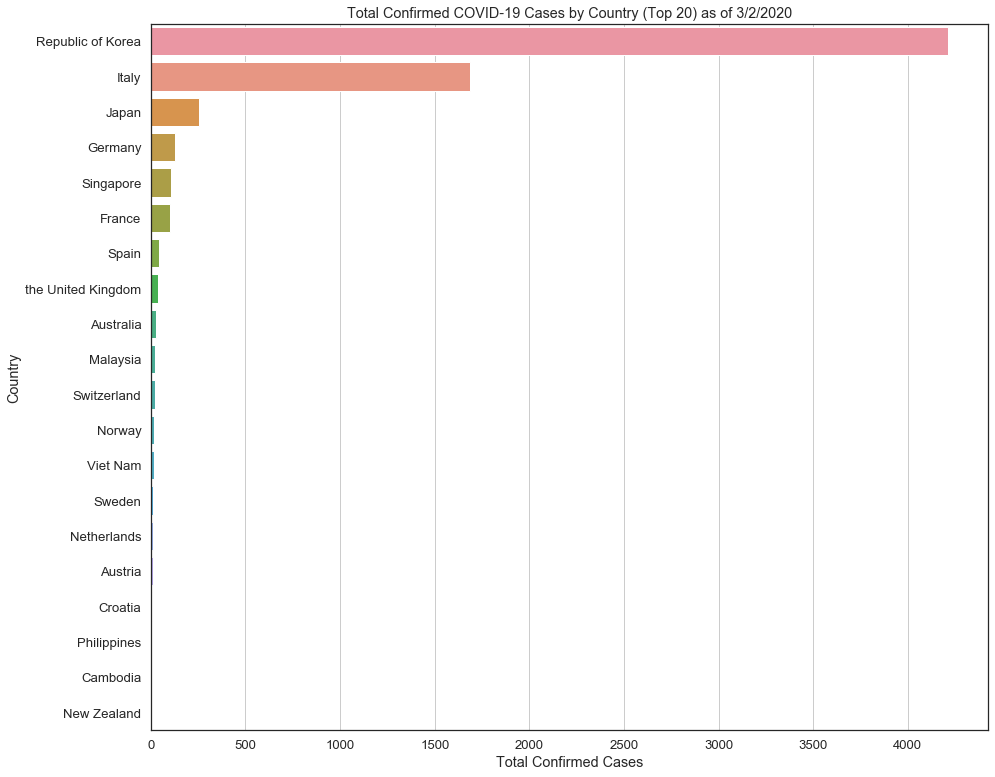

In [237]:
fig = plt.figure(figsize=(15,13))
plt.grid()
sns.barplot(y="Country", x="Total Confirmed Cases", data=outside_china.head(20).sort_values(by="Total Confirmed Cases", ascending=False), orient='h')
plt.title("Total Confirmed COVID-19 Cases by Country (Top 20) as of 3/2/2020")
#plt.savefig("c.png")
plt.show()